# Prediction survival on the Titanic

In this model, we gonna see the chances of survival in the case of Titanic sinking. This Python 3 environment comes with many helpful analytics.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data management

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

In [6]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_test = df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df.Age = df.Age.fillna(df.Age.mean())
df_test.Age = df_test.Age.fillna(df_test.Age.mean())
df.Embarked = df.Embarked.fillna(df.Embarked.mode()[0])
df_test.Embarked = df_test.Embarked.fillna(df_test.Embarked.mode()[0])
df_test.Fare = df_test.Fare.fillna(df_test.Fare.mean())

In [7]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploritory Data Analysis (EDA)

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

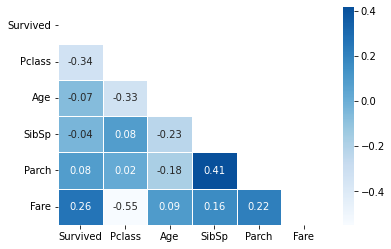

In [9]:
corr_matrix = df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

sns.heatmap(tri_df, cmap='Blues', center=0, linewidths=1, annot=True, fmt='.2f')
plt.show()

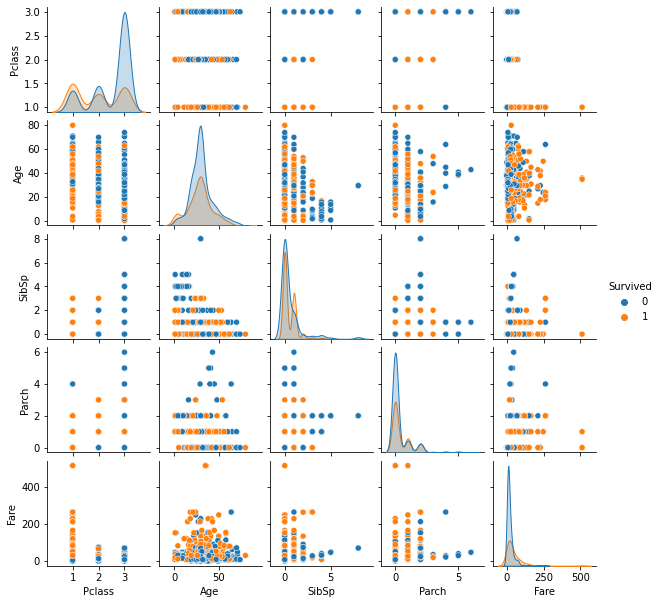

In [10]:
sns.pairplot(hue='Survived', data=df, height=1.7)
plt.show()

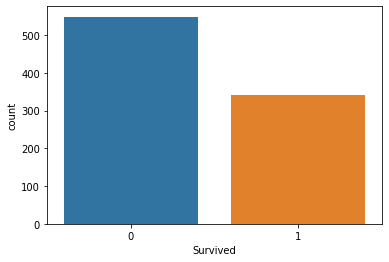

In [11]:
sns.countplot(x=df.Survived)
plt.show()

# Preprocessing and Feature Engineering Function

In [12]:
def clear_outliers(data, column_input):
    
    mean = column_input.mean()
    std = column_input.std()

    upper = mean + std*5
    lower = mean - std*5

    data = data[(column_input < upper) & (column_input > lower)]
    
    return data

for col in ['Fare', 'SibSp', 'Parch']:
    df = clear_outliers(df, df[col])

In [13]:
print(df.describe())
print(df.head())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  875.000000  875.000000  875.000000  875.000000  875.000000  875.000000
mean     0.386286    2.302857   29.610309    0.464000    0.336000   30.240528
std      0.487176    0.835937   13.088363    0.885696    0.692569   41.328316
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.895800
50%      0.000000    3.000000   29.699118    0.000000    0.000000   14.108300
75%      1.000000    3.000000   35.000000    1.000000    0.000000   30.035400
max      1.000000    3.000000   80.000000    5.000000    4.000000  263.000000
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0 

In [14]:
labels = ['minor', 'young adult', 'adult', 'elderly']
bins = [0, 17, 30, 60, np.inf] 

df.Age = pd.cut(df.Age, bins=bins, labels=labels)
df_test.Age = pd.cut(df_test.Age, bins=bins, labels=labels)

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,young adult,1,0,7.2500,S
1,1,1,female,adult,1,0,71.2833,C
2,1,3,female,young adult,0,0,7.9250,S
3,1,1,female,adult,1,0,53.1000,S
4,0,3,male,adult,0,0,8.0500,S


In [16]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

for col in ['Sex', 'Age', 'Embarked']:
    df[col] = LabelEncoder().fit_transform(df[col])
    df_test[col] = LabelEncoder().fit_transform(df_test[col])
    
df.Fare = MinMaxScaler().fit_transform(df.Fare.values.reshape(-1,1)) 
df_test.Fare = MinMaxScaler().fit_transform(df_test.Fare.values.reshape(-1,1))
print(df.head())

   Survived  Pclass  Sex  Age  SibSp  Parch      Fare  Embarked
0         0       3    1    3      1      0  0.027567         2
1         1       1    0    0      1      0  0.271039         0
2         1       3    0    3      0      0  0.030133         2
3         1       1    0    0      1      0  0.201901         2
4         0       3    1    0      0      0  0.030608         2


In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
print('Original class distribution:')
print(df.Survived.value_counts())

cols = df.columns
X = df.drop(['Survived'],axis=1)
y = df.Survived

smote = SMOTE()
X, y = smote.fit_resample(X, y)

df = pd.DataFrame(X, columns=cols)
df.Survived = y

print('\nClass distribution after applying a SMOTE Technique:',)
print(y.value_counts())

Original class distribution:
0    537
1    338
Name: Survived, dtype: int64

Class distribution after applying a SMOTE Technique:
0    537
1    537
Name: Survived, dtype: int64


# Prediction Modeling

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [20]:
classifiers = {'LinearRegression':LinearRegression(), 'DecisionTreeClassifier':DecisionTreeClassifier(),
          'RandomForestClassifier':RandomForestClassifier(), 'RandomForestClassifier':RandomForestClassifier(),
          'GradientBoostingClassifier':GradientBoostingClassifier(), 'KNeighborsClassifier':KNeighborsClassifier()}

roc_auc_scores = {}
for idx, clf in enumerate(list(classifiers.values())):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=0)
    model = clf
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc_scores[list(classifiers.keys())[idx]] = metrics.roc_auc_score(y_test, y_pred)

In [21]:
print('\nComparison between different model rou_auc accuracy scores:',)    
pd.DataFrame.from_dict(roc_auc_scores, orient='index',columns=['Scores'])


Comparison between different model rou_auc accuracy scores:


,Scores
LinearRegression,0.832943
DecisionTreeClassifier,0.816328
RandomForestClassifier,0.801622
GradientBoostingClassifier,0.830080
KNeighborsClassifier,0.807002


In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    int32  
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int32  
dtypes: float64(1), int32(3), int64(4)
memory usage: 21.4 KB


In [23]:
model_clf = GradientBoostingClassifier()
model_clf.fit(X_train, y_train)
y_pred_test = model_clf.predict(df_test.drop(['PassengerId'], axis=1))
print('\nServival prediction of original test set with Gradient Boosting:',)
pd.DataFrame(y_pred_test).value_counts()


Servival prediction of original test set with Gradient Boosting:


0    307
1    111
dtype: int64

In [24]:
df_final = pd.concat([df_test.reset_index(drop=True), pd.DataFrame(y_pred_test, columns=['Survived'])], axis=1)
df_submittal = df_final[['PassengerId', 'Survived']]
output = pd.DataFrame({'PassengerId': df_final.PassengerId, 'Survived': df_final.Survived})
output.to_csv('submittal.csv', index=False)
print("Your submittal was successfully saved!")

Your submittal was successfully saved!
